In [1]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt

In [2]:
#loading the twitter archive dataframe and read as csv
twitter_archive = pd.read_csv('C:\\Users\\USER\\Desktop\\ALX-T\\twitter-archive-enhanced.csv')

In [3]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [4]:
#view the first few rows of the twitter archive file
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
#load the image prediction and read csv 
image_prediction = pd.read_csv('C:\\Users\\USER\\Desktop\\ALX-T\\image-predictions.tsv', sep = '\t')

In [6]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [7]:
#visualize the image prediction dataframe
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
tweet = []
#we open the json file and turn the item to a python dictionary
with open('tweet-json.txt', 'r') as jfile:
    for item in jfile:
        data = json.loads(item)
        tweet.append(data)

In [9]:
#creating a new dataframe that contains the columns we need and dicarding the ones we do not need 
tweet_counts = pd.DataFrame(tweet, columns = ['id', 'retweet_count', 'favorite_count'])

In [10]:
tweet_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [11]:
#visualize the data in the tweet counts
tweet_counts.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# DATA WRANGLE AND ASSESSING

In [12]:
#checking the information about the three dataframes
print(twitter_archive.shape, image_prediction.shape, tweet_counts.shape)

(2356, 17) (2075, 12) (2354, 3)


In [13]:
def drop_RowCol(dframe, RowCol, axis=1):
    dframe.drop(RowCol, axis=axis, inplace=True)

In [14]:
reply_index = twitter_archive[pd.notnull(twitter_archive['in_reply_to_status_id'])].index

In [15]:
reply_index

Int64Index([  30,   55,   64,  113,  148,  149,  179,  184,  186,  188,  189,
             218,  228,  234,  251,  274,  290,  291,  313,  342,  346,  387,
             409,  427,  498,  513,  565,  570,  576,  611,  701,  843,  857,
             967, 1005, 1016, 1018, 1080, 1127, 1295, 1330, 1339, 1345, 1356,
            1446, 1452, 1464, 1474, 1479, 1497, 1501, 1523, 1598, 1605, 1618,
            1630, 1634, 1663, 1689, 1774, 1819, 1842, 1844, 1852, 1866, 1882,
            1885, 1892, 1895, 1905, 1914, 1940, 2036, 2038, 2149, 2169, 2189,
            2298],
           dtype='int64')

In [16]:
drop_RowCol(twitter_archive, reply_index, axis = 0)

In [17]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2278 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2278 non-null   object 
 4   source                      2278 non-null   object 
 5   text                        2278 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2274 non-null   object 
 10  rating_numerator            2278 non-null   int64  
 11  rating_denominator          2278 non-null   int64  
 12  name                        2278 non-null   object 
 13  doggo                       2278 

In [18]:
retweet_index = twitter_archive[pd.notnull(twitter_archive['retweeted_status_id'])].index

In [19]:
drop_RowCol(twitter_archive, retweet_index, axis = 0)

In [20]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

In [21]:
columns = ['in_reply_to_status_id','in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']

drop_RowCol(twitter_archive, columns, axis=1)

In [22]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


In [23]:
twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [24]:
twitter_archive['source'] = twitter_archive['source'].str.extract('^<a.+>(.+)</a>$')

In [25]:
twitter_archive['source'].value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

In [26]:
pd.set_option('display.max_colwidth', 500)

In [27]:
twitter_archive['text'].sample(30)

1318                         This is Oliver (pronounced "Ricardo"). He's a ship captain. Controls these treacherous waters. 11/10 would sail with https://t.co/bxjO45rXKd
1401                                                                I know this is a tad late but here's a wonderful Valentine's Day pupper 12/10 https://t.co/hTE2PEwGvi
939                                                                                             So this just changed my life. 13/10 please enjoy  https://t.co/dsv4xAtfv7
1535                                                                             Happy Wednesday here's a pup wearing a beret. 12/10 please enjoy https://t.co/MXedEzSHIf
478                                                                                     Here's a pupper with squeaky hiccups. Please enjoy. 13/10 https://t.co/MiMKtsLN6k
2224                                                                                                         I can't do better than he did. 10/10 http

In [28]:
twitter_archive['rating_numerator'] = twitter_archive['text'].str.extract('(\d+\.*\d*/\d+)', expand=False).str.split('/').str[0]

In [29]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [30]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [31]:
criteria = [(image_prediction.p1_dog == True), (image_prediction.p2_dog == True),(image_prediction.p3_dog == True)]

breed = [image_prediction.p1, image_prediction.p2, image_prediction.p3]

prediction = [image_prediction.p1_conf, image_prediction.p2_conf, image_prediction.p3_conf]

image_prediction['breed'] = np.select(criteria, breed, default='None')

image_prediction['prediction'] = np.select(criteria, prediction, default=0)

In [32]:
image_prediction.prediction.value_counts()

0.000000    324
0.705092      2
0.617389      2
0.677408      2
0.533180      2
           ... 
0.315163      1
0.516257      1
0.749368      1
0.573140      1
0.716012      1
Name: prediction, Length: 1689, dtype: int64

Checking the information about the three dataframes

In [33]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   object
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(2), object(10)
memory usage: 213.0+ KB


In [34]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2075 non-null   int64  
 1   jpg_url     2075 non-null   object 
 2   img_num     2075 non-null   int64  
 3   p1          2075 non-null   object 
 4   p1_conf     2075 non-null   float64
 5   p1_dog      2075 non-null   bool   
 6   p2          2075 non-null   object 
 7   p2_conf     2075 non-null   float64
 8   p2_dog      2075 non-null   bool   
 9   p3          2075 non-null   object 
 10  p3_conf     2075 non-null   float64
 11  p3_dog      2075 non-null   bool   
 12  breed       2075 non-null   object 
 13  prediction  2075 non-null   float64
dtypes: bool(3), float64(4), int64(2), object(5)
memory usage: 184.5+ KB


In [35]:
tweet_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [36]:
merge_1 = pd.merge(twitter_archive, tweet_counts,left_on='tweet_id', right_on='id', how='left' )
merge_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   object
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
 12  id                  2097 non-null   int64 
 13  retweet_count       2097 non-null   int64 
 14  favorite_count      2097 non-null   int64 
dtypes: int64(5), object(10)
memory usage: 262.1+ KB


In [37]:
merge_2 = pd.merge(merge_1, image_prediction, on='tweet_id', how='inner' )
merge_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1971 non-null   int64  
 1   timestamp           1971 non-null   object 
 2   source              1971 non-null   object 
 3   text                1971 non-null   object 
 4   expanded_urls       1971 non-null   object 
 5   rating_numerator    1971 non-null   object 
 6   rating_denominator  1971 non-null   int64  
 7   name                1971 non-null   object 
 8   doggo               1971 non-null   object 
 9   floofer             1971 non-null   object 
 10  pupper              1971 non-null   object 
 11  puppo               1971 non-null   object 
 12  id                  1971 non-null   int64  
 13  retweet_count       1971 non-null   int64  
 14  favorite_count      1971 non-null   int64  
 15  jpg_url             1971 non-null   object 
 16  img_nu

In [38]:
tweet_counts = tweet_counts.rename(columns={'id': 'tweet_id','retweet_count':'retweet_count', 'favorite_count': 'favorite_count' })
tweet_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [39]:
n_merge_1 = pd.merge(twitter_archive, tweet_counts, on='tweet_id', how='left' )
n_merge_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   object
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
 12  retweet_count       2097 non-null   int64 
 13  favorite_count      2097 non-null   int64 
dtypes: int64(4), object(10)
memory usage: 245.7+ KB


In [40]:
n_merge_2 = pd.merge(n_merge_1, image_prediction, on='tweet_id', how='inner' )
n_merge_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1971 non-null   int64  
 1   timestamp           1971 non-null   object 
 2   source              1971 non-null   object 
 3   text                1971 non-null   object 
 4   expanded_urls       1971 non-null   object 
 5   rating_numerator    1971 non-null   object 
 6   rating_denominator  1971 non-null   int64  
 7   name                1971 non-null   object 
 8   doggo               1971 non-null   object 
 9   floofer             1971 non-null   object 
 10  pupper              1971 non-null   object 
 11  puppo               1971 non-null   object 
 12  retweet_count       1971 non-null   int64  
 13  favorite_count      1971 non-null   int64  
 14  jpg_url             1971 non-null   object 
 15  img_num             1971 non-null   int64  
 16  p1    

In [41]:
#merging all the three datasets into one master file
n_merge_2.to_csv('twitter_archive_master.csv', index=False)

In [42]:
master_df = pd.read_csv('C:\\Users\\USER\\Desktop\\ALX-T\\twitter_archive_master.csv')

## ANALYSIS

In [43]:
#checking the number of dog stages present
master_df.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,prediction
1201,689999384604450816,2016-01-21 02:34:07 +0000,Twitter for iPhone,This is Covach. He's trying to melt the snow. 10/10 we all believe in you buddy https://t.co/fgMaP2zDMt,https://twitter.com/dog_rates/status/689999384604450816/photo/1,10.0,10,Covach,None,None,...,0.444499,True,English_springer,0.129830,True,pug,0.073806,True,standard_poodle,0.444499
964,710588934686908417,2016-03-17 22:09:38 +0000,Twitter for iPhone,This is Beemo. He's a Chubberflop mix. 12/10 would cross the world for https://t.co/kzMVMU8HBV,"https://twitter.com/dog_rates/status/710588934686908417/photo/1,https://twitter.com/dog_rates/status/710588934686908417/photo/1,https://twitter.com/dog_rates/status/710588934686908417/photo/1,https://twitter.com/dog_rates/status/710588934686908417/photo/1",12.0,10,Beemo,None,None,...,0.982004,True,Cardigan,0.008943,True,malamute,0.007550,True,Pembroke,0.982004
1238,687480748861947905,2016-01-14 03:45:57 +0000,Twitter for iPhone,Another magnificent photo. 12/10 https://t.co/X5w387K5jr,https://twitter.com/dog_rates/status/687480748861947905/photo/1,12.0,10,None,None,None,...,0.472273,True,English_setter,0.166862,True,Brittany_spaniel,0.163411,True,English_springer,0.472273
438,796865951799083009,2016-11-11 00:03:42 +0000,Twitter for iPhone,This is Tyr. He's just checking on you. Nifty af tongue slip. 12/10 would absolutely pet https://t.co/Jgnuiyvq06,https://twitter.com/dog_rates/status/796865951799083009/photo/1,12.0,10,Tyr,None,None,...,0.839129,True,Boston_bull,0.080699,True,Pembroke,0.034505,True,Cardigan,0.839129
1064,701981390485725185,2016-02-23 04:06:20 +0000,Twitter for iPhone,This is Fiji. She's a Powdered Stegafloof. Very rare. 12/10 https://t.co/fZRob6eotY,https://twitter.com/dog_rates/status/701981390485725185/photo/1,12.0,10,Fiji,None,None,...,0.491022,True,weasel,0.130879,False,Yorkshire_terrier,0.099241,True,Pomeranian,0.491022


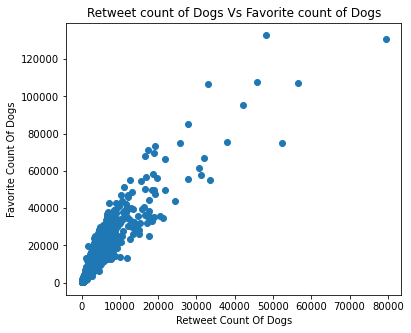

In [44]:
#checking if retweet count has a relationship with favourite count
x= master_df.retweet_count
y= master_df.favorite_count
def scatter_plot(x,y):
    fig, ax= plt.subplots(figsize= (6,5))
    plt.scatter(x, y)
    ax.set(xlabel= 'Retweet Count Of Dogs', ylabel= 'Favorite Count Of Dogs',
           title= 'Retweet count of Dogs Vs Favorite count of Dogs')
    
scatter_plot(x,y)

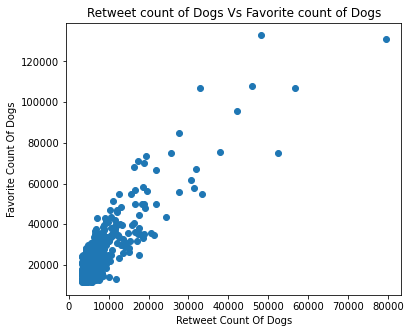

In [45]:
# Removing data outliers to capture all values
quantile= master_df.query('retweet_count> retweet_count.quantile(0.75) and favorite_count>favorite_count.quantile(0.75)')
xq= quantile['retweet_count']
yq= quantile['favorite_count']
# plot the graph

scatter_plot(xq, yq)

<AxesSubplot:title={'center':'FREQUENCY OF DOGS RATINGS'}>

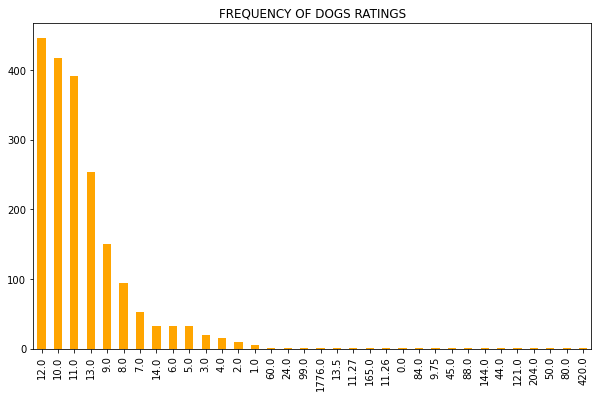

In [46]:
# most common rate people ahave rated dogs
master_df.rating_numerator.value_counts().plot.bar(title= 'FREQUENCY OF DOGS RATINGS', figsize= (10,6),color= 'orange')

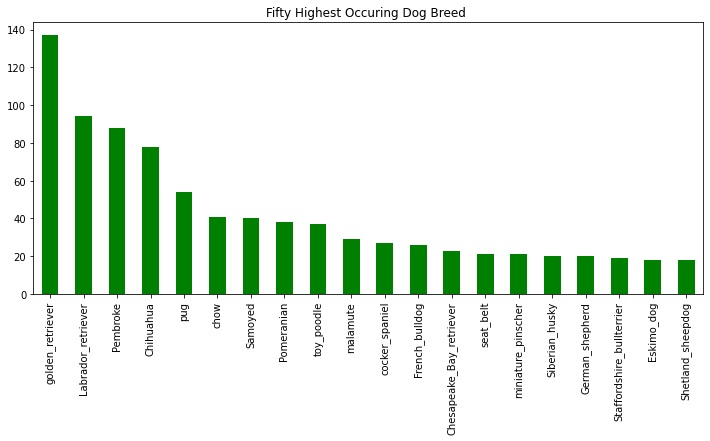

In [47]:
# different breeds of dogs that are in p1 dataset
master_df['p1'].value_counts()[:20].plot.bar(title= 'Fifty Highest Occuring Dog Breed ',
                                              figsize= (12,5),color= 'green');

<AxesSubplot:title={'center':'TWEETS BY SOURCE'}>

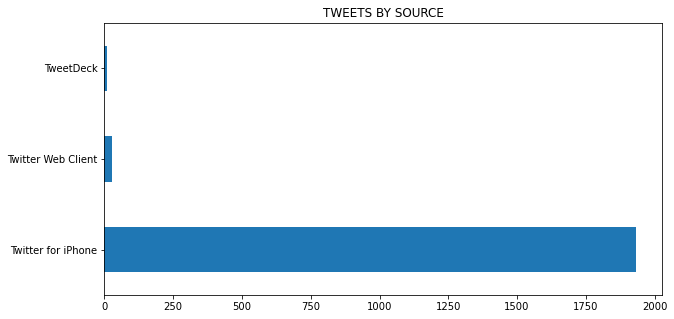

In [48]:
master_df['source'].value_counts().plot(kind = 'barh', title = 'TWEETS BY SOURCE', figsize= (10,5))